In [2]:
import numpy  as np
import pandas as pd

from matplotlib import pyplot as plt

from common import hallmark as hm
import os

In [16]:
pf1 = hm.ParaFrame('cache/SPO/summ/SgrA_a{aspin:g}_i{inc:g}_f230.e9.tsv')
pf2 = hm.ParaFrame('../../../dump/Illinois_thermal_w5/Sa{aspin:g}_i{inc:g}/summ_Rh40_230GHz.tsv')

for k in set(pf1.keys()) - {'path'}:
    globals()[k] = np.unique(pf1[k])
    print(k, globals()[k][:16])

mode = ['SPO', 'RhRl']

inc [30.]
aspin [-0.94 -0.5   0.    0.5   0.94]


In [18]:
print(df.time_hr)

0      141.647776
1      141.676104
2      141.704443
3      141.732781
4      141.761088
          ...    
995    169.835697
996    169.864009
997    169.892358
998    169.920667
999    169.949004
Name: time_hr, Length: 1000, dtype: float64


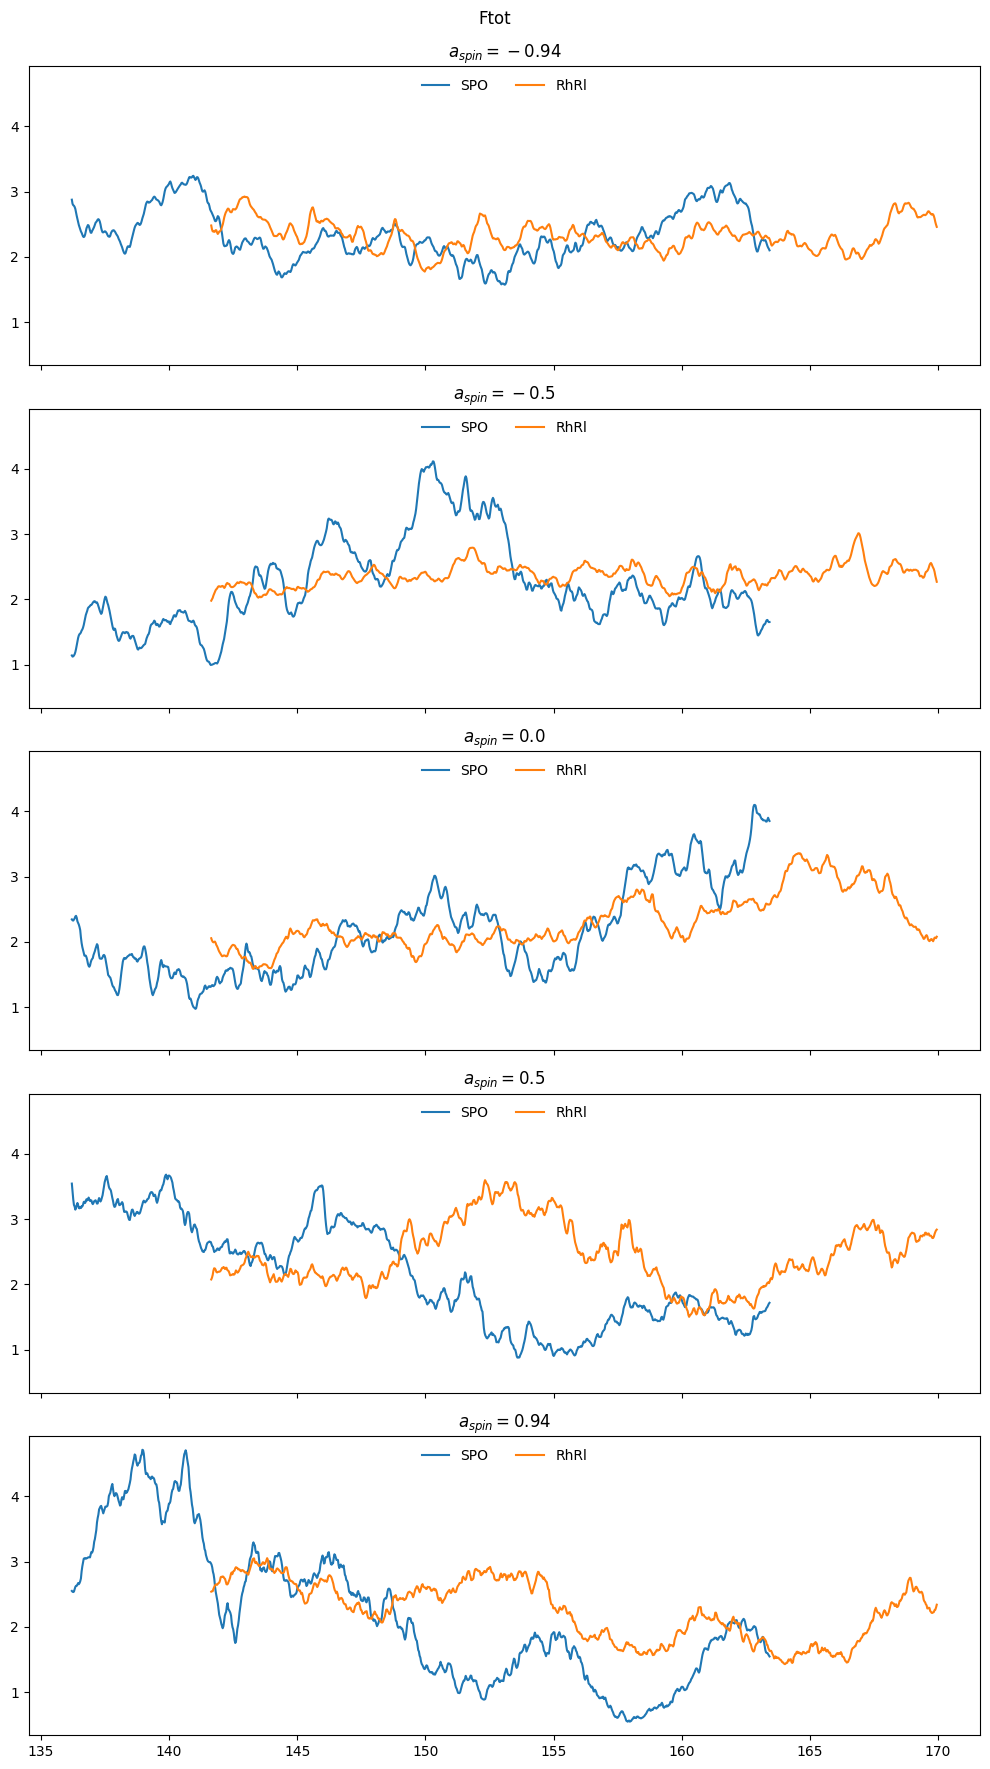

In [17]:
# Plot Light Curve
if True:
    fig, axes = plt.subplots(5, figsize=(10,18), sharex=True, sharey=True)

    for c, a in enumerate(aspin):
        if True:
            for i in [30]:
                sel = pf1(aspin=a)(inc=i)
                df = pd.read_csv(sel.path.iloc[0], sep='\t')
                axes[c].plot(df.time_hr, df.Ftot,label=mode[0])
                axes[c].set_title(f'$a_{{spin}} = {a}$')
                axes[c].legend(frameon=False, loc='upper center', ncol=3)
                
                sel = pf2(aspin=a)(inc=i)
                df = pd.read_csv(sel.path.iloc[0], sep='\t')
                axes[c].plot(df.time_hr, df.Ftot,label=mode[1])
                axes[c].set_title(f'$a_{{spin}} = {a}$')
                axes[c].legend(frameon=False, loc='upper center', ncol=3)
   
    fig.suptitle("Ftot\n")
    fig.tight_layout()